In [43]:
import serial
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from serial.tools import list_ports
port = list(list_ports.comports())
name = port[0]
ser = serial.Serial(name.device, 9600, timeout=None)

Full image

In [61]:
def shoot(full=True):
    if full == True:
        ser.write(b"full\r")
        rgb565img = np.zeros(shape=(144,176),dtype=np.uint16)
        x = ser.read(176*144*2)
        dt = np.dtype('<u1')
        c = np.frombuffer(x,dtype=dt)
        idx = int(0)
        for i in range(0,144,1):
            for j in range(0,176,1):
                rgb565img[i,j] = c[idx] << 8 | c[idx+1]
                idx += 2

        r = ((rgb565img >> 11) & 0x1f) << 3
        g = ((rgb565img >> 5)  & 0x3f) << 2
        b = (rgb565img & 0x1f) << 3
                
    else:
        ser.write(b"half\r")
        # get channels
        r = np.zeros((72,88),dtype=np.uint8)
        g = np.zeros((72,88),dtype=np.uint8)
        b = np.zeros((72,88),dtype=np.uint8)


        for h in range(0,72,1):
            for w in range(0,88,1):
                #read one pixel in rgb888
                k = ser.read(3)
                pixels = np.frombuffer(k,dtype=np.uint8)
                r[h,w] = pixels[0]
                g[h,w] = pixels[1]
                b[h,w] = pixels[2]

    # stack channels
    rgb = np.dstack((r,g,b)).astype(np.uint8)
    print(rgb.shape)
    plt.ion()
    plt.show()
    plt.imshow(rgb)  # plot the figure
    plt.gcf().canvas.draw()

(144, 176, 3)
(72, 88, 3)


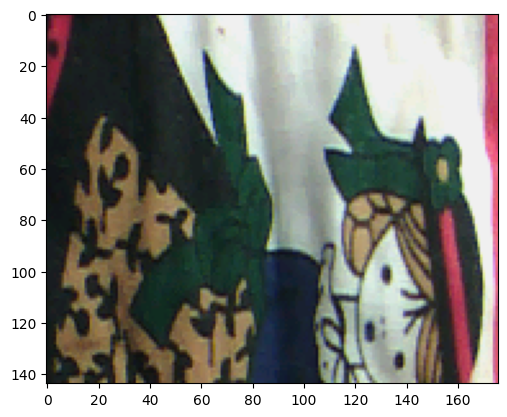

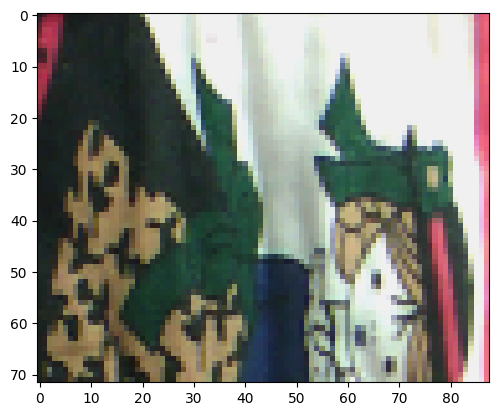

In [63]:
port = list(list_ports.comports())
name = port[0]
ser = serial.Serial(name.device, 9600, timeout=None)
shoot(full=True)
shoot(full=False)
#50688
#50336

Get downsampled image

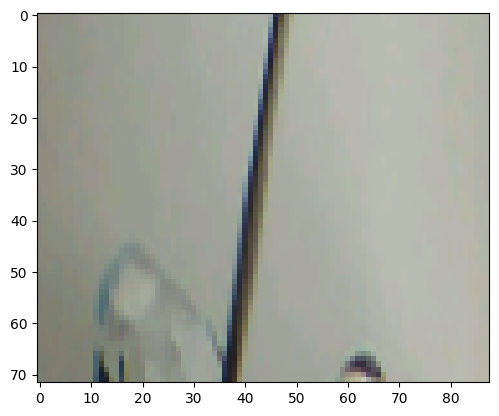

In [16]:
# get channels
r = np.zeros((72,88),dtype=np.uint8)
g = np.zeros((72,88),dtype=np.uint8)
b = np.zeros((72,88),dtype=np.uint8)


for h in range(0,72,1):
    for w in range(0,88,1):
        #read one pixel in rgb888
        k = ser.read(3)
        pixels = np.frombuffer(k,dtype=np.uint8)
        r[h,w] = pixels[0]
        g[h,w] = pixels[1]
        b[h,w] = pixels[2]

# stack channels
image_dw = np.dstack((r,g,b)).astype(np.uint8)
plt.imshow(image_dw)

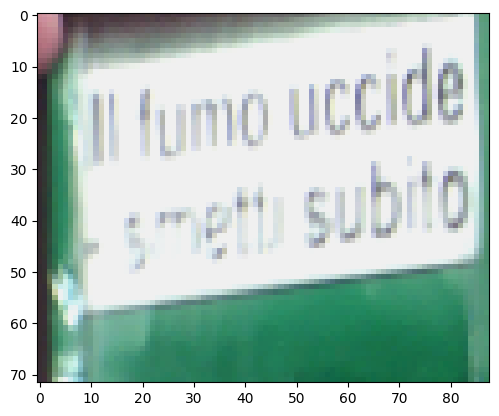

In [27]:
half_image = np.zeros(shape=(72,88,3),dtype=np.uint8)

for i in range(0,144,2):
    for j in range(0,176,2):
        sect = rgb[i:i+2,j:j+2]
        newpixel = (np.sum(sect,axis=(0,1))/4).astype(np.uint8)
        half_image[int(i/2),int(j/2),:] = newpixel
plt.imshow(half_image)  


(144, 176, 3)


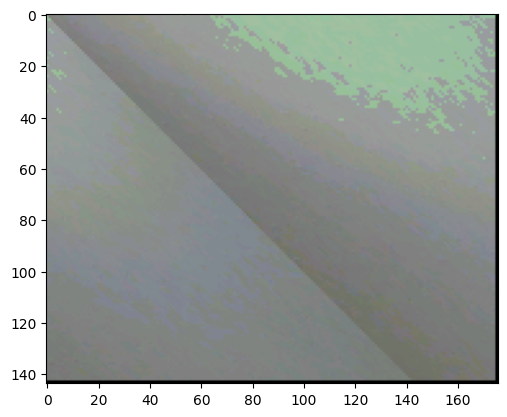

In [251]:
b = list(x)
#c = np.array(b,dtype=np.uint8)
c = np.frombuffer(x,dtype=np.uint8)
count = 0
for i in range(0,143):
    for j in range(0,175):
        rgb565img[i,j] = (c[count] << 8 | c[count+1]).astype(np.uint16)
        count += 2

r = (((rgb565img >> 11) & 0x001f) << 3).astype(np.uint8)
g = (((rgb565img >> 5)  & 0x003f) << 2).astype(np.uint8)
b = ((rgb565img & 0x001f) << 3).astype(np.uint8)
rgb = np.dstack((r,g,b)).astype(np.uint8)
print(rgb.shape)
        
plt.imshow(rgb)  

In [169]:
c = np.array(b,dtype=np.uint8)
rgb565img = np.zeros(shape=(176,144,1),dtype=np.uint16)
z =len(b)
d = np.reshape(c, (int(z/2),2))
print(d.shape)
count = 0
for i in range(0,143):
    for j in range(0,175):
        print(d[count,:],np.sum(d[count,:]))
        rgb565img[j,i,:] = np.sum(d[count,:])
        count += 1

(25344, 2)
[132  82] 214
[132  48] 180
[132  80] 212
[132  80] 212
[132  82] 214
[132  82] 214
[132  82] 214
[132  82] 214
[132  82] 214
[132  82] 214
[140  82] 222
[132  48] 180
[132  82] 214
[132  82] 214
[132  50] 182
[132  50] 182
[132  50] 182
[132  48] 180
[132  82] 214
[132  80] 212
[132  48] 180
[132  50] 182
[132  50] 182
[132  48] 180
[132  50] 182
[132  50] 182
[132  18] 150
[132  50] 182
[132  50] 182
[132  50] 182
[132  16] 148
[132  48] 180
[132  48] 180
[132  48] 180
[132  48] 180
[132  48] 180
[132  48] 180
[132  48] 180
[132  16] 148
[132  16] 148
[131 240] 371
[132  48] 180
[132  16] 148
[132  16] 148
[132  48] 180
[132  48] 180
[132  16] 148
[132  48] 180
[132  16] 148
[132  16] 148
[132  16] 148
[132  16] 148
[132  16] 148
[132  16] 148
[132  16] 148
[132  16] 148
[132  16] 148
[124  15] 139
[123 239] 362
[123 240] 363
[132  16] 148
[123 240] 363
[123 240] 363
[123 240] 363
[123 240] 363
[123 240] 363
[123 239] 362
[123 239] 362
[123 207] 330
[123 239] 362
[123 239]